## GDP dataset ##

### Packages and dataset ###

In [2]:
#IMPORT NEEDED PACKAGES

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from plotly.subplots import make_subplots

In [2]:
# READ RAW CSV
df_raw = pd.read_csv('../data/FAOSTAT_gdp.csv', encoding = 'latin')

### Exploring the data ###

In [3]:
df_raw.shape

(15799, 161)

In [4]:
df_raw.head()

Area Code Area Code (M49)         Area  Item Code                    Item  \
0          2            '004  Afghanistan      22008  Gross Domestic Product   
1          2            '004  Afghanistan      22008  Gross Domestic Product   
2          2            '004  Afghanistan      22008  Gross Domestic Product   
3          2            '004  Afghanistan      22008  Gross Domestic Product   
4          2            '004  Afghanistan      22008  Gross Domestic Product   

   Element Code                            Element      Unit          Y1970  \
0          6109               Value Local Currency  millions      77.911878   
1          6110                          Value US$  millions    1731.435587   
2          6119               Value US$ per capita       US$     154.957138   
3          6183  Value Local Currency, 2015 prices  millions  640024.694809   
4          6185  Value US$ per capita, 2015 prices       US$     937.000000   

  Y1970F  Y1970N          Y1971 Y1971F  Y1971N          Y1972 Y1972F  Y1972N  \
0      X     NaN      81.574837      X     NaN      74.152916      X     NaN   
1      X     NaN    1812.837521      X     NaN    1647.900178      X     NaN   
2      X     NaN     157.975357      X     NaN     139.756605      X     NaN   
3      X     NaN  638260.085798      X     NaN  556498.281260      X     NaN   
4      X     NaN     910.000000      X     NaN     772.000000      X     NaN   

           Y1973 Y1973F  Y1973N          Y1974 Y1974F  Y1974N          Y1975  \
0      76.619555      X     NaN      92.774575      X     NaN     104.385259   
1    1702.716294      X     NaN    2061.729287      X     NaN    2319.753506   
2     140.616194      X     NaN     166.095029      X     NaN     182.813796   
3  545260.592016      X     NaN  571963.541311      X     NaN  606538.115012   
4     736.000000      X     NaN     754.000000      X     NaN     782.000000   

  Y1975F  Y1975N          Y1976 Y1976F  Y1976N          Y1977 Y1977F  Y1977N  \
0      X     NaN     113.107176      X     NaN     128.917758      X     NaN   
1      X     NaN    2513.580659      X     NaN    2864.939207      X     NaN   
2      X     NaN     194.202472      X     NaN     217.513678      X     NaN   
3      X     NaN  640652.358105      X     NaN  622700.035211      X     NaN   
4      X     NaN     810.000000      X     NaN     773.000000      X     NaN   

           Y1978 Y1978F  Y1978N          Y1979 Y1979F  Y1979N          Y1980  \
0     145.028303      X     NaN     158.776212      X     NaN     160.930107   
1    3222.963833      X     NaN    3630.767856      X     NaN    3646.796868   
2     241.579792      X     NaN     270.729453      X     NaN     273.035141   
3  650881.544583      X     NaN  647761.511702      X     NaN  625359.636217   
4     798.000000      X     NaN     790.000000      X     NaN     766.000000   

  Y1980F  Y1980N          Y1981 Y1981F  Y1981N          Y1982 Y1982F  Y1982N  \
0      X     NaN     169.591475      X     NaN     173.589299      X     NaN   
1      X     NaN    3427.482014      X     NaN    3430.645143      X     NaN   
2      X     NaN     260.216148      X     NaN     266.302169      X     NaN   
3      X     NaN  630423.153215      X     NaN  643414.185241      X     NaN   
4      X     NaN     783.000000      X     NaN     817.000000      X     NaN   

           Y1983 Y1983F  Y1983N          Y1984 Y1984F  Y1984N          Y1985  \
0     172.453817      X     NaN     170.475688      X     NaN     168.520249   
1    3408.204613      X     NaN    3369.110951      X     NaN    3330.465681   
2     271.835860      X     NaN     276.059517      X     NaN     278.975344   
3  670981.813064      X     NaN  687706.446508      X     NaN  691900.378533   
4     875.000000      X     NaN     922.000000      X     NaN     948.000000   

  Y1985F  Y1985N          Y1986 Y1986F  Y1986N          Y1987 Y1987F  Y1987N  \
0      X     NaN     168.035667      X     NaN     150.976242      X     NaN   
1

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15799 entries, 0 to 15798
Columns: 161 entries, Area Code to Y2020N
dtypes: float64(102), int64(3), object(56)
memory usage: 19.4+ MB


In [6]:
#Goal: Simplify the dataframe by deleting Year+F and Year+N
column_headers = list(df_raw.columns.values)
column_headers

['Area Code',
 'Area Code (M49)',
 'Area',
 'Item Code',
 'Item',
 'Element Code',
 'Element',
 'Unit',
 'Y1970',
 'Y1970F',
 'Y1970N',
 'Y1971',
 'Y1971F',
 'Y1971N',
 'Y1972',
 'Y1972F',
 'Y1972N',
 'Y1973',
 'Y1973F',
 'Y1973N',
 'Y1974',
 'Y1974F',
 'Y1974N',
 'Y1975',
 'Y1975F',
 'Y1975N',
 'Y1976',
 'Y1976F',
 'Y1976N',
 'Y1977',
 'Y1977F',
 'Y1977N',
 'Y1978',
 'Y1978F',
 'Y1978N',
 'Y1979',
 'Y1979F',
 'Y1979N',
 'Y1980',
 'Y1980F',
 'Y1980N',
 'Y1981',
 'Y1981F',
 'Y1981N',
 'Y1982',
 'Y1982F',
 'Y1982N',
 'Y1983',
 'Y1983F',
 'Y1983N',
 'Y1984',
 'Y1984F',
 'Y1984N',
 'Y1985',
 'Y1985F',
 'Y1985N',
 'Y1986',
 'Y1986F',
 'Y1986N',
 'Y1987',
 'Y1987F',
 'Y1987N',
 'Y1988',
 'Y1988F',
 'Y1988N',
 'Y1989',
 'Y1989F',
 'Y1989N',
 'Y1990',
 'Y1990F',
 'Y1990N',
 'Y1991',
 'Y1991F',
 'Y1991N',
 'Y1992',
 'Y1992F',
 'Y1992N',
 'Y1993',
 'Y1993F',
 'Y1993N',
 'Y1994',
 'Y1994F',
 'Y1994N',
 'Y1995',
 'Y1995F',
 'Y1995N',
 'Y1996',
 'Y1996F',
 'Y1996N',
 'Y1997',
 'Y1997F',
 'Y1997N',


In [7]:
for col in df_raw.columns:
    if 'F' in col:
        df_raw.drop(col, axis=1, inplace=True)
    if 'N' in col:
        df_raw.drop(col, axis=1, inplace=True)

    

In [8]:
df_raw

Area Code Area Code (M49)                                     Area  \
0              2            '004                              Afghanistan   
1              2            '004                              Afghanistan   
2              2            '004                              Afghanistan   
3              2            '004                              Afghanistan   
4              2            '004                              Afghanistan   
...          ...             ...                                      ...   
15794       5817            '902  Net Food Importing Developing Countries   
15795       5817            '902  Net Food Importing Developing Countries   
15796       5817            '902  Net Food Importing Developing Countries   
15797       5817            '902  Net Food Importing Developing Countries   
15798       5817            '902  Net Food Importing Developing Countries   

       Item Code                    Item  Element Code  \
0          22008  Gross Domestic Product          6109   
1          22008  Gross Domestic Product          6110   
2          22008  Gross Domestic Product          6119   
3          22008  Gross Domestic Product          6183   
4          22008  Gross Domestic Product          6185   
...          ...                     ...           ...   
15794      22011   Gross National Income          6103   
15795      22011   Gross National Income          6129   
15796      22011   Gross National Income         61290   
15797      22011   Gross National Income          6143   
15798      22011   Gross National Income          6163   

                                                 Element      Unit  \
0                                   Value Local Currency  millions   
1                                              Value US$  millions   
2                                   Value US$ per capita       US$   
3                      Value Local Currency, 2015 prices  millions   
4                      Value US$ per capita, 2015 prices       US$   
...                                                  ...       ...   
15794                                   Share of GDP US$         %   
15795                                  Annual growth US$         %   
15796                       Annual growth US$ per capita         %   
15797     Share of Value Added (Total Manufacturing) US$         %   
15798  Ratio of Value Added (Agriculture, Forestry an...       NaN   

               Y1970          Y1971          Y1972          Y1973  \
0          77.911878      81.574837      74.152916      76.619555   
1        1731.435587    1812.837521    1647.900178    1702.716294   
2         154.957138     157.975357     139.756605     140.616194   
3      640024.694809  638260.085798  556498.281260  545260.592016   
4         937.000000     910.000000     772.000000     736.000000   
...              ...            ...            ...            ...   
15794      97.416450      97.135921      97.242871      97.341419   
15795            NaN       7.465709       6.126472      16.943898   
15796            NaN       4.806655       3.408209      14.312631   
15797     686.881551     676.479644     671.724619     661.442520   
15798       3.915855       4.053454       4.128555       4.238039   

               Y1974          Y1975          Y1976          Y1977  \
0          92.774575     104.385259     113.107176     128.917758   
1        2061.729287    2319.753506    2513.580659    2864.939207   
2         166.095029     182.813796     194.202472     217.513678   
3      571963.541311  606538.115012  640652.358105  622700.035211   
4         754.000000     782.000000     810.000000     773.000000   
...              ...            ...            ...            ...   
15794      98.086288      98.670127      98.476801      98.616841   
15795      26.198685      12.464953       8.058114      12.858459   
15796      23.178024       9.689742       5.366832      10.019574   
15797     632.118942     

Annual growth rate of real Gross Domestic Product (GDP) per capita is calculated as the percentage change in the real GDP per capita between two consecutive years. Real GDP per capita is calculated by dividing GDP at constant prices by the population of a country or area. The data for real GDP are measured in constant US dollars to facilitate the calculation of country growth rates and aggregation of the country data.

In [9]:
#Only interested in the GDP with elements: Value US$, 2015 prices(expressed in millions), Value US$ per capita(US$), Annual growth US$ (%), Annual growth US$ per capita(%)

df = df_raw[df_raw['Item'] == 'Gross Domestic Product']
df.head()


Area Code Area Code (M49)         Area  Item Code                    Item  \
0          2            '004  Afghanistan      22008  Gross Domestic Product   
1          2            '004  Afghanistan      22008  Gross Domestic Product   
2          2            '004  Afghanistan      22008  Gross Domestic Product   
3          2            '004  Afghanistan      22008  Gross Domestic Product   
4          2            '004  Afghanistan      22008  Gross Domestic Product   

   Element Code                            Element      Unit          Y1970  \
0          6109               Value Local Currency  millions      77.911878   
1          6110                          Value US$  millions    1731.435587   
2          6119               Value US$ per capita       US$     154.957138   
3          6183  Value Local Currency, 2015 prices  millions  640024.694809   
4          6185  Value US$ per capita, 2015 prices       US$     937.000000   

           Y1971          Y1972          Y1973          Y1974          Y1975  \
0      81.574837      74.152916      76.619555      92.774575     104.385259   
1    1812.837521    1647.900178    1702.716294    2061.729287    2319.753506   
2     157.975357     139.756605     140.616194     166.095029     182.813796   
3  638260.085798  556498.281260  545260.592016  571963.541311  606538.115012   
4     910.000000     772.000000     736.000000     754.000000     782.000000   

           Y1976          Y1977          Y1978          Y1979          Y1980  \
0     113.107176     128.917758     145.028303     158.776212     160.930107   
1    2513.580659    2864.939207    3222.963833    3630.767856    3646.796868   
2     194.202472     217.513678     241.579792     270.729453     273.035141   
3  640652.358105  622700.035211  650881.544583  647761.511702  625359.636217   
4     810.000000     773.000000     798.000000     790.000000     766.000000   

           Y1981          Y1982          Y1983          Y1984          Y1985  \
0     169.591475     173.589299     172.453817     170.475688     168.520249   
1    3427.482014    3430.645143    3408.204613    3369.110951    3330.465681   
2     260.216148     266.302169     271.835860     276.059517     278.975344   
3  630423.153215  643414.185241  670981.813064  687706.446508  691900.378533   
4     783.000000     817.000000     875.000000     922.000000     948.000000   

           Y1986          Y1987          Y1988          Y1989          Y1990  \
0     168.035667     150.976242     137.322243     161.491528     180.109889   
1    3320.888887    2983.743471    2713.899488    3191.557068    3559.511736   
2     282.961677     257.118767     233.594278     268.901352     286.772753   
3  708420.513683  656098.152210  598661.464479  554676.102558  532223.150831   
4     987.000000     925.000000     843.000000     764.000000     701.000000   

           Y1991          Y1992          Y1993          Y1994          Y1995  \
0     172.172997     174.301038     143.927675     729.118301    2297.365030   
1    3402.654940    3444.711414    2844.442641    1715.169169    2756.838036   
2     255.857628     237.803353     179.839036     100.444869     152.221868   
3  483512.600665  476587.229752  385407.968239  296737.925985  387337.309453   
4     595.000000     538.000000     399.000000     284.000000     350.000000   

           Y1996          Y1997          Y1998          Y1999          Y2000  \
0    6674.524156    8773.855716    8805.572314  100567.527295  158270.632870   
1    2669.785634    2924.589326    2935.139404    2157.197316    3342.034168   
2     141.607370     151.085927     148.706776     106.946309     160.829727   
3  401148.285358  380405.169744  362609.298241  345273.395382  326789.905499   
4     348.000000     321.000000     300.000000     280.000000     257.000000   

           Y2001          Y2002          Y2003          Y2004          Y2005  \
0  170927.404578  195740.846106  230601.118468  257813.610332  307884.813631   
1

In [10]:
df = df[df['Element'].isin(['Value US$', 'Value US$ per capita', 'Annual growth US$, 2015 prices', 'Annual growth US$ per capita, 2015 prices'])]

In [11]:
df.head()

Area Code Area Code (M49)         Area  Item Code                    Item  \
1           2            '004  Afghanistan      22008  Gross Domestic Product   
2           2            '004  Afghanistan      22008  Gross Domestic Product   
10          2            '004  Afghanistan      22008  Gross Domestic Product   
11          2            '004  Afghanistan      22008  Gross Domestic Product   
57          3            '008      Albania      22008  Gross Domestic Product   

    Element Code                                    Element      Unit  \
1           6110                                  Value US$  millions   
2           6119                       Value US$ per capita       US$   
10          6182             Annual growth US$, 2015 prices         %   
11         61820  Annual growth US$ per capita, 2015 prices         %   
57          6110                                  Value US$  millions   

          Y1970        Y1971        Y1972        Y1973        Y1974  \
1   1731.435587  1812.837521  1647.900178  1702.716294  2061.729287   
2    154.957138   157.975357   139.756605   140.616194   166.095029   
10          NaN    -0.275710   -12.810108    -2.019357     4.897282   
11          NaN    -2.881537   -15.164835    -4.663212     2.445652   
57  2265.577056  2330.584860  2397.526448  2466.543461  2537.015817   

          Y1975        Y1976        Y1977        Y1978        Y1979  \
1   2319.753506  2513.580659  2864.939207  3222.963833  3630.767856   
2    182.813796   194.202472   217.513678   241.579792   270.729453   
10     6.044891     5.624419    -2.802194     4.525696    -0.479355   
11     3.713528     3.580563    -4.567901     3.234153    -1.002506   
57  2610.110369  2685.745678  2760.746397  2842.275926  2372.305641   

          Y1980        Y1981        Y1982        Y1983        Y1984  \
1   3646.796868  3427.482014  3430.645143  3408.204613  3369.110951   
2    273.035141   260.216148   266.302169   271.835860   276.059517   
10    -3.458352     0.809697     2.060684     4.284585     2.492561   
11    -3.037975     2.219321     4.342273     7.099143     5.371429   
57  2141.837051  2215.474766  2280.424885  2305.384485  2275.736342   

          Y1985        Y1986        Y1987        Y1988        Y1989  \
1   3330.465681  3320.888887  2983.743471  2713.899488  3191.557068   
2    278.975344   282.961677   257.118767   233.594278   268.901352   
10     0.609843     2.387646    -7.385777    -8.754283    -7.347285   
11     2.819957     4.113924    -6.281662    -8.864865    -9.371293   
57  2324.414456  2397.086883  2378.194810  2460.399974  2940.586487   

          Y1990        Y1991        Y1992        Y1993        Y1994  \
1   3559.511736  3402.654940  3444.711414  2844.442641  1715.169169   
2    286.772753   255.857628   237.803353   179.839036   100.444869   
10    -4.047939    -9.152279    -1.432304   -19.131705   -23.006800   
11    -8.246073   -15.121255    -9.579832   -25.836431   -28.822055   
57  2145.751209  1597.139589  1516.132824  1700.439125  1880.950821   

          Y1995        Y1996        Y1997        Y1998        Y1999  \
1   2756.838036  2669.785634  2924.589326  2935.139404  2157.197316   
2    152.221868   141.607370   151.085927   148.706776   106.946309   
10    30.531784     3.565620    -5.170935    -4.678136    -4.780877   
11    23.239437    -0.571429    -7.758621    -6.542056    -6.666667   
57  2392.764887  3199.642024  2224.654241  2554.868837  3221.670165   

          Y2000        Y2001        Y2002        Y2003        Y2004  \
1   3342.034168  3598.470576  4141.523943  4729.042179  5388.482107   
2    160.829727   166.541981   183.247028   199.698828   217.921744   
10    -5.353291    -5.635687    48.567111    15.806910     2.860370   
11    -8.214286    -9.338521    42.489270    10.240964    -1.366120   
57  3487.586302  3926.887597  4355.865889  5561.459461  7177.030365   

          Y2005        Y2006         Y2007         Y2008         Y2009  \
1   6220.574147

In [12]:
#Save the transformed dataset

In [13]:
df.to_csv('../data/gdp_clean.csv')

In [14]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', '

In [15]:
df_columns = df.columns.str.replace('Y', '')
df_columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [16]:
list_columns = list(df_columns)

In [17]:
df.set_axis(list_columns, axis= 1, inplace=True)
df.head()

C:\Users\raque\AppData\Local\Temp\ipykernel_9144\2105464021.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(list_columns, axis= 1, inplace=True)


Area Code Area Code (M49)         Area  Item Code                    Item  \
1           2            '004  Afghanistan      22008  Gross Domestic Product   
2           2            '004  Afghanistan      22008  Gross Domestic Product   
10          2            '004  Afghanistan      22008  Gross Domestic Product   
11          2            '004  Afghanistan      22008  Gross Domestic Product   
57          3            '008      Albania      22008  Gross Domestic Product   

    Element Code                                    Element      Unit  \
1           6110                                  Value US$  millions   
2           6119                       Value US$ per capita       US$   
10          6182             Annual growth US$, 2015 prices         %   
11         61820  Annual growth US$ per capita, 2015 prices         %   
57          6110                                  Value US$  millions   

           1970         1971         1972         1973         1974  \
1   1731.435587  1812.837521  1647.900178  1702.716294  2061.729287   
2    154.957138   157.975357   139.756605   140.616194   166.095029   
10          NaN    -0.275710   -12.810108    -2.019357     4.897282   
11          NaN    -2.881537   -15.164835    -4.663212     2.445652   
57  2265.577056  2330.584860  2397.526448  2466.543461  2537.015817   

           1975         1976         1977         1978         1979  \
1   2319.753506  2513.580659  2864.939207  3222.963833  3630.767856   
2    182.813796   194.202472   217.513678   241.579792   270.729453   
10     6.044891     5.624419    -2.802194     4.525696    -0.479355   
11     3.713528     3.580563    -4.567901     3.234153    -1.002506   
57  2610.110369  2685.745678  2760.746397  2842.275926  2372.305641   

           1980         1981         1982         1983         1984  \
1   3646.796868  3427.482014  3430.645143  3408.204613  3369.110951   
2    273.035141   260.216148   266.302169   271.835860   276.059517   
10    -3.458352     0.809697     2.060684     4.284585     2.492561   
11    -3.037975     2.219321     4.342273     7.099143     5.371429   
57  2141.837051  2215.474766  2280.424885  2305.384485  2275.736342   

           1985         1986         1987         1988         1989  \
1   3330.465681  3320.888887  2983.743471  2713.899488  3191.557068   
2    278.975344   282.961677   257.118767   233.594278   268.901352   
10     0.609843     2.387646    -7.385777    -8.754283    -7.347285   
11     2.819957     4.113924    -6.281662    -8.864865    -9.371293   
57  2324.414456  2397.086883  2378.194810  2460.399974  2940.586487   

           1990         1991         1992         1993         1994  \
1   3559.511736  3402.654940  3444.711414  2844.442641  1715.169169   
2    286.772753   255.857628   237.803353   179.839036   100.444869   
10    -4.047939    -9.152279    -1.432304   -19.131705   -23.006800   
11    -8.246073   -15.121255    -9.579832   -25.836431   -28.822055   
57  2145.751209  1597.139589  1516.132824  1700.439125  1880.950821   

           1995         1996         1997         1998         1999  \
1   2756.838036  2669.785634  2924.589326  2935.139404  2157.197316   
2    152.221868   141.607370   151.085927   148.706776   106.946309   
10    30.531784     3.565620    -5.170935    -4.678136    -4.780877   
11    23.239437    -0.571429    -7.758621    -6.542056    -6.666667   
57  2392.764887  3199.642024  2224.654241  2554.868837  3221.670165   

           2000         2001         2002         2003         2004  \
1   3342.034168  3598.470576  4141.523943  4729.042179  5388.482107   
2    160.829727   166.541981   183.247028   199.698828   217.921744   
10    -5.353291    -5.635687    48.567111    15.806910     2.860370   
11    -8.214286    -9.338521    42.489270    10.240964    -1.366120   
57  3487.586302  3926.887597  4355.865889  5561.459461  7177.030365   

           2005         2006          2007          2008          2009  \
1   6220.574147

In [18]:
df.to_csv('../data/gdp_clean.csv')

### Emissions dataset ###

In [19]:
em_raw = pd.read_csv('../data/FAOSTAT_emissions.csv', encoding = 'latin')

C:\Users\raque\AppData\Local\Temp\ipykernel_9144\50326155.py:1: DtypeWarning: Columns (99,102,105,108,111,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,191) have mixed types. Specify dtype option on import or set low_memory=False.
  em_raw = pd.read_csv('../data/FAOSTAT_emissions.csv', encoding = 'latin')


In [20]:
em_raw.head()
em_raw['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Democratic People's Republic of Korea",
  

In [21]:
#Clean the years
for col in em_raw.columns:
    if 'F' in col:
        em_raw.drop(col, axis=1, inplace=True)
    if 'N' in col:
        em_raw.drop(col, axis=1, inplace=True)
em_raw

Area Code Area Code (M49)         Area  Item Code  \
0              2            '004  Afghanistan       5064   
1              2            '004  Afghanistan       5064   
2              2            '004  Afghanistan       5064   
3              2            '004  Afghanistan       5064   
4              2            '004  Afghanistan       5064   
...          ...             ...          ...        ...   
58760       5873            '198         OECD       6829   
58761       5873            '198         OECD       6829   
58762       5873            '198         OECD       6829   
58763       5873            '198         OECD       6829   
58764       5873            '198         OECD       6829   

                             Item  Element Code  \
0                   Crop Residues          7234   
1                   Crop Residues          7236   
2                   Crop Residues          7230   
3                   Crop Residues        724313   
4                   Crop Residues        723113   
...                           ...           ...   
58760  All sectors without LULUCF          7273   
58761  All sectors without LULUCF        717815   
58762  All sectors without LULUCF        724413   
58763  All sectors without LULUCF        724313   
58764  All sectors without LULUCF        723113   

                                    Element  Source Code      Source  \
0                    Direct emissions (N2O)         3050  FAO TIER 1   
1                  Indirect emissions (N2O)         3050  FAO TIER 1   
2                           Emissions (N2O)         3050  FAO TIER 1   
3          Emissions (CO2eq) from N2O (AR5)         3050  FAO TIER 1   
4                   Emissions (CO2eq) (AR5)         3050  FAO TIER 1   
...                                     ...          ...         ...   
58760                       Emissions (CO2)         3050  FAO TIER 1   
58761  Emissions (CO2eq) from F-gases (AR5)         3050  FAO TIER 1   
58762      Emissions (CO2eq) from CH4 (AR5)         3050  FAO TIER 1   
58763      Emissions (CO2eq) from N2O (AR5)         3050  FAO TIER 1   
58764               Emissions (CO2eq) (AR5)         3050  FAO TIER 1   

             Unit     Y1961     Y1962     Y1963     Y1964     Y1965     Y1966  \
0      kilotonnes    0.8762    0.8829    0.8236    0.8882    0.8978    0.8466   
1      kilotonnes    0.1972    0.1987    0.1853    0.1998    0.2020    0.1905   
2      kilotonnes    1.0734    1.0816    1.0089    1.0880    1.0998    1.0371   
3      kilotonnes  284.4486  286.6192  267.3466  288.3212  291.4406  274.8304   
4      kilotonnes  284.4486  286.6192  267.3466  288.3212  291.4406  274.8304   
...           ...       ...       ...       ...       ...       ...       ...   
58760  kilotonnes       NaN       NaN       NaN       NaN       NaN       NaN   
58761  kilotonnes       NaN       NaN       NaN       NaN       NaN       NaN   
58762  kilotonnes       NaN       NaN       NaN       NaN       NaN       NaN   
58763  kilotonnes       NaN       NaN       NaN       NaN       NaN       NaN   
58764  kilotonnes       NaN       NaN       NaN       NaN       NaN       NaN   

          Y1967     Y1968     Y1969     Y1970     Y1971     Y1972     Y1973  \
0        0.8783    0.8886    0.9123    0.8304    0.8093    0.9531    0.9725   
1        0.1976    0.1999    0.2053    0.1868    0.1821    0.2145    0.2188   
2        1.0759    1.0885    1.1176    1.0172    0.9914    1.1676    1.1913   
3      285.1026  288.4483  296.1556  269.5529  262.7338  309.4116  315.6948   
4      285.1026  288.4483  296.1556  269.5529  262.7338  309.4116  315.6948   
...         ...       ...       ...       ...       ...       ...       ...   
58760       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
58761       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
58762       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
58763       NaN       NaN       NaN       NaN

In [22]:
em_raw_columns = em_raw.columns.str.replace('Y', '')

In [23]:
list_columns = list(em_raw_columns)

In [24]:
em_raw.set_axis(list_columns, axis= 1, inplace=True)
em_raw.head()

C:\Users\raque\AppData\Local\Temp\ipykernel_9144\4151740144.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  em_raw.set_axis(list_columns, axis= 1, inplace=True)


Area Code Area Code (M49)         Area  Item Code           Item  \
0          2            '004  Afghanistan       5064  Crop Residues   
1          2            '004  Afghanistan       5064  Crop Residues   
2          2            '004  Afghanistan       5064  Crop Residues   
3          2            '004  Afghanistan       5064  Crop Residues   
4          2            '004  Afghanistan       5064  Crop Residues   

   Element Code                           Element  Source Code      Source  \
0          7234            Direct emissions (N2O)         3050  FAO TIER 1   
1          7236          Indirect emissions (N2O)         3050  FAO TIER 1   
2          7230                   Emissions (N2O)         3050  FAO TIER 1   
3        724313  Emissions (CO2eq) from N2O (AR5)         3050  FAO TIER 1   
4        723113           Emissions (CO2eq) (AR5)         3050  FAO TIER 1   

         Unit      1961      1962      1963      1964      1965      1966  \
0  kilotonnes    0.8762    0.8829    0.8236    0.8882    0.8978    0.8466   
1  kilotonnes    0.1972    0.1987    0.1853    0.1998    0.2020    0.1905   
2  kilotonnes    1.0734    1.0816    1.0089    1.0880    1.0998    1.0371   
3  kilotonnes  284.4486  286.6192  267.3466  288.3212  291.4406  274.8304   
4  kilotonnes  284.4486  286.6192  267.3466  288.3212  291.4406  274.8304   

       1967      1968      1969      1970      1971      1972      1973  \
0    0.8783    0.8886    0.9123    0.8304    0.8093    0.9531    0.9725   
1    0.1976    0.1999    0.2053    0.1868    0.1821    0.2145    0.2188   
2    1.0759    1.0885    1.1176    1.0172    0.9914    1.1676    1.1913   
3  285.1026  288.4483  296.1556  269.5529  262.7338  309.4116  315.6948   
4  285.1026  288.4483  296.1556  269.5529  262.7338  309.4116  315.6948   

       1974      1975      1976      1977      1978      1979      1980  \
0    0.9880    1.0138    1.0401    0.9566    0.9972    0.9533    0.9156   
1    0.2223    0.2281    0.2340    0.2152    0.2244    0.2145    0.2060   
2    1.2103    1.2419    1.2741    1.1718    1.2215    1.1678    1.1216   
3  320.7274  329.1046  337.6487  310.5341  323.7090  309.4714  297.2257   
4  320.7274  329.1046  337.6487  310.5341  323.7090  309.4714  297.2257   

       1981      1982      1983      1984      1985      1986      1987  \
0    0.8766    0.8407    0.8065    0.7713    0.7319    0.6981    0.7706   
1    0.1972    0.1892    0.1815    0.1735    0.1647    0.1571    0.1734   
2    1.0738    1.0299    0.9880    0.9448    0.8965    0.8551    0.9439   
3  284.5502  272.9278  261.8147  250.3726  237.5808  226.6047  250.1406   
4  284.5502  272.9278  261.8147  250.3726  237.5808  226.6047  250.1406   

       1988      1989      1990      1991      1992      1993      1994  \
0    0.6917    0.6601    0.6334    0.6454    0.6054    0.7110    0.7456   
1    0.1556    0.1485    0.1425    0.1452    0.1362    0.1600    0.1678   
2    0.8473    0.8086    0.7759    0.7906    0.7416    0.8710    0.9134   
3  224.5390  214.2788  205.6077  209.4971  196.5341  230.8175  242.0494   
4  224.5390  214.2788  205.6077  209.4971  196.5341  230.8175  242.0494   

       1995      1996      1997      1998      1999     2000      2001  \
0    0.7511    0.7672    0.8511    0.8854    0.7624    0.520    0.5267   
1    0.1690    0.1726    0.1915    0.1992    0.1715    0.117    0.1185   
2    0.9201    0.9398    1.0426    1.0847    0.9340    0.637    0.6452   
3  243.8152  249.0364  276.2940  287.4346  247.4980  168.807  170.9884   
4  243.8152  249.0364  276.2940  287.4346  247.4980  168.807  170.9884   

       2002      2003      2004      2005      2006      2007      2008  \
0    0.8200    0.9988    0.8225    1.1821    1.0277    1.2426    0.8869   
1    0.1845    0.2247    0.1851    0.2660    0.2312    0.2796    0.1996   
2    1.0045    1.2235    1.0075    1.4481    1.2589    1.5222    1.0865   
3  266.1975  324.2195  266.9995  383.7498  333.6093  403.3749  287.9099   
4  266.1975  324.219

In [25]:
em = em_raw.drop(['Element Code', 'Area Code', 'Source Code', 'Area Code (M49)', 'Source'], axis=1)
em.head()
em['Element'].unique()

array(['Direct emissions (N2O)', 'Indirect emissions (N2O)',
       'Emissions (N2O)', 'Emissions (CO2eq) from N2O (AR5)',
       'Emissions (CO2eq) (AR5)', 'Emissions (CH4)',
       'Emissions (CO2eq) from CH4 (AR5)', 'Emissions (CO2)',
       'Emissions (CO2eq) from F-gases (AR5)'], dtype=object)

In [26]:
#from this dataset we only take the values when Element == "Emissions (CH4)", "Emissions (N20)", "Emissions (CO2)"
em = em[em['Element'].isin(['Emissions (N2O)', 'Emissions (CH4)', 'Emissions (CO2)'])]
em.head()

Area  Item Code                     Item          Element  \
2   Afghanistan       5064            Crop Residues  Emissions (N2O)   
5   Afghanistan       5060         Rice Cultivation  Emissions (CH4)   
8   Afghanistan       5066  Burning - Crop residues  Emissions (CH4)   
9   Afghanistan       5066  Burning - Crop residues  Emissions (CH4)   
10  Afghanistan       5066  Burning - Crop residues  Emissions (N2O)   

          Unit     1961     1962     1963     1964     1965     1966     1967  \
2   kilotonnes   1.0734   1.0816   1.0089   1.0880   1.0998   1.0371   1.0759   
5   kilotonnes  29.4000  29.4000  29.4000  30.8000  30.8000  31.0800  28.8400   
8   kilotonnes   4.0734   4.1933   4.1933   4.2260   4.2150   4.2169   3.9679   
9   kilotonnes      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10  kilotonnes   0.1056   0.1087   0.1087   0.1096   0.1093   0.1093   0.1029   

       1968     1969     1970     1971     1972     1973     1974     1975  \
2    1.0885   1.1176   1.0172   0.9914   1.1676   1.1913   1.2103   1.2419   
5   28.8400  28.8400  28.2800  28.0000  29.4000  29.4000  29.4000  29.4000   
8    3.7314   3.7798   3.8748   4.1894   4.6862   4.0719   4.0644   4.1637   
9       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10   0.0967   0.0980   0.1005   0.1086   0.1215   0.1056   0.1054   0.1079   

       1976     1977     1978     1979     1980     1981     1982     1983  \
2    1.2741   1.1718   1.2215   1.1678   1.1216   1.0738   1.0299   0.9880   
5   29.4000  29.4000  29.4000  28.8400  26.7400  24.3600  23.1700  21.7000   
8    4.1574   4.1475   4.1561   3.9218   3.6997   3.5589   3.4257   3.2522   
9       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10   0.1078   0.1075   0.1078   0.1017   0.0959   0.0923   0.0888   0.0843   

       1984     1985     1986     1987     1988     1989     1990     1991  \
2    0.9448   0.8965   0.8551   0.9439   0.8473   0.8086   0.7759   0.7906   
5   20.8600  19.7400  21.0000  22.6800  25.2000  23.8000  24.5000  24.2200   
8    3.1384   2.9808   2.8837   2.9944   2.8052   2.7255   2.6977   2.7606   
9       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10   0.0814   0.0773   0.0748   0.0776   0.0727   0.0707   0.0699   0.0716   

       1992     1993     1994     1995     1996     1997     1998     1999  \
2    0.7416   0.8710   0.9134   0.9201   0.9398   1.0426   1.0847   0.9340   
5   24.5000  24.5000  25.2000  23.8000  24.5000  25.2000  25.2000  19.6000   
8    2.5314   3.0714   3.2408   3.2016   3.0714   3.1047   3.1717   2.8326   
9       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10   0.0656   0.0796   0.0840   0.0830   0.0796   0.0805   0.0822   0.0734   

       2000     2001     2002     2003     2004     2005     2006     2007  \
2    0.6370   0.6452   1.0045   1.2235   1.0075   1.4481   1.2589   1.5222   
5   18.2000  16.9400  18.9000  20.3000  27.3000  22.4000  22.4000  23.8000   
8    2.6471   2.3205   2.3553   3.4017   3.0089   3.4752   3.2535   3.2921   
9       NaN      NaN      NaN      NaN      NaN  10.0700      NaN      NaN   
10   0.0686   0.0602   0.0611   0.0882   0.0780   0.0901   0.0844   0.0854   

       2008     2009     2010     2011     2012     2013     2014     2015  \
2    1.0865   1.7051   1.5609   1.2643   1.6815   1.7173   1.7865   1.5220   
5   26.6000  28.0000  29.1200  29.4000  28.7000  28.7000  30.8000  22.9600   
8    2.9674   3.4614   3.3507   3.2219   3.4035   3.4506   3.5413   2.9452   
9       NaN      NaN      NaN      NaN      NaN   5.0000      NaN      NaN   
10   0.0769   0.0897   0.0869   0.0835   0.0882   0.0895   0.0918   0.0764   

       2016     2017     2018     2019     2020  2021     2030     2050  
2    1.4627   1.3005   1.1011   1.4916   1.6133   NaN   1.8788   2.3751  
5   16.6600  15.3233  16.4555  17.8542  20.6577   NaN  32.3685  41.3331  
8    3.0734   2.7997   2.1390   2.9693   3.4826   NaN  

In [27]:
em['Item'].unique()

array(['Crop Residues', 'Rice Cultivation', 'Burning - Crop residues',
       'Enteric Fermentation', 'Manure Management',
       'Manure left on Pasture', 'Manure applied to Soils',
       'Synthetic Fertilizers', 'Drained organic soils (CO2)',
       'Drained organic soils (N2O)', 'On-farm energy use', 'Forestland',
       'Net Forest conversion', 'Savanna fires', 'Fires in organic soils',
       'Forest fires', 'Fires in humid tropical forests',
       'Waste - agri-food systems', 'Fertilizers Manufacturing',
       'On-farm electricity use', 'Food Processing', 'Food Packaging',
       'Food Retail', 'Food Household Consumption', 'Food Transport',
       'Energy', 'IPPU', 'Waste', 'Other', 'Farm-gate emissions',
       'Land Use change', 'Emissions on agricultural land',
       'Pre- and post- production', 'Agri-food systems',
       'IPCC Agriculture', 'Agricultural Soils', 'LULUCF', 'AFOLU',
       'All sectors with LULUCF', 'All sectors without LULUCF',
       'International bunk

In [28]:
em = em[em['Item'].isin(['Forestland', 'Net Forest conversion', 'All sectors with LULUCF', 'All sectors without LULUCF'])]
em.head()

Area  Item Code                     Item          Element  \
59   Afghanistan       6751               Forestland  Emissions (CO2)   
61   Afghanistan       6750    Net Forest conversion  Emissions (CO2)   
212  Afghanistan       6825  All sectors with LULUCF  Emissions (CH4)   
213  Afghanistan       6825  All sectors with LULUCF  Emissions (N2O)   
214  Afghanistan       6825  All sectors with LULUCF  Emissions (CO2)   

           Unit  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  \
59   kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
61   kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
212  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
213  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
214  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
59    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
61    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
212   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
213   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
214   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1983  1984  1985  1986  1987  1988  1989       1990       1991  \
59    NaN   NaN   NaN   NaN   NaN   NaN   NaN -2388.8030 -2388.8030   
61    NaN   NaN   NaN   NaN   NaN   NaN   NaN     0.0000     0.0000   
212   NaN   NaN   NaN   NaN   NaN   NaN   NaN   283.4658   296.7285   
213   NaN   NaN   NaN   NaN   NaN   NaN   NaN     9.5760     9.8467   
214   NaN   NaN   NaN   NaN   NaN   NaN   NaN   380.1970   217.1970   

          1992       1993       1994       1995       1996       1997  \
59  -2388.8030 -2388.8030 -2388.8030 -2388.8030 -2388.8030 -2388.8030   
61      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
212   302.0717   309.1496   323.3615   342.3478   378.7676   408.8165   
213     9.6522     9.7923     9.2279     9.6663    10.4915    11.5397   
214  -827.8030  -898.8030  -967.8030 -1025.8030 -1104.8030 -1185.8030   

          1998       1999       2000       2001       2002       2003  \
59  -2388.8030 -2388.8030 -2388.8030   121.9016   121.9016   121.9016   
61      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
212   432.2855   466.2228   419.1023   371.2675   447.8971   463.6655   
213    12.5119    13.4194    11.6462    10.2895    11.9045    12.3870   
214 -1244.8030 -1460.8030 -1474.8030  1066.9016  1347.9016  1478.9016   

          2004       2005       2006       2007       2008       2009  \
59    121.9016   121.9016   121.9016   121.9016   121.9016   121.9016   
61      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
212   465.8062   477.8682   487.9664   501.3724   546.1793   562.1262   
213    12.3179    12.8563    12.3056    12.0883    13.1119    14.1314   
214  1187.9016  1610.9016  1947.9016  2579.9016  4516.9016  7068.9016   

          2010        2011        2012       2013       2014       2015  \
59    121.9016   -246.2191   -246.2191  -246.2191  -246.2191  -246.2191   
61      0.0000      0.0000      0.0000     0.0000     0.0000     0.0000   
212   631.3810    652.3301    648.2713   648.8900   663.5479   634.5774   
213    15.6135     16.3091     16.3303    16.3723    17.3372    17.2410   
214  8751.9016  12143.7809  10317.7809  8554.7809  7853.7809  7937.7809   

          2016       2017       2018       2019       2020  2021      2030  \
59    154.6574   154.6574   154.6574   154.6574   154.6574   NaN       NaN   
61      0.0000     0.0000     0.0000     0.0000     0.0000   NaN       NaN   
212   629.3893   624.3983   635.7765   638.0114   662.7644   NaN  516.8208   
213    17.0810    17.9014    15.9129    15.9893    16.7350   NaN   18.5334   
214  7194.6574  8355.6574  8840.6574  

In [29]:
em['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Democratic People's Republic of Korea",
  

In [30]:
em.to_csv('../data/emissions_clean.csv')

### SDG Database ###

In [3]:
car = pd.read_csv('../../sdg/carbonpricing.csv', header = 1)
co2 = pd.read_csv('../../sdg/co2fossils.csv', header = 1)
oce = pd.read_csv('../../sdg/oceanindex.csv', header = 1)
ter = pd.read_csv('../../sdg/terbio.csv', header = 1)
wat = pd.read_csv('../../sdg/waterbio.csv', header = 1)

In [4]:
car.head()

ISO      Country   2012  2013  2014   2015  2016  2017   2018
0  AUS    Australia  20.27   NaN   NaN  20.34   NaN   NaN  20.36
1  AUT      Austria  37.30   NaN   NaN  38.58   NaN   NaN  47.62
2  BEL      Belgium  28.94   NaN   NaN  29.08   NaN   NaN  33.65
3  CHE  Switzerland  57.51   NaN   NaN  69.91   NaN   NaN  69.31
4  CHL        Chile  12.53   NaN   NaN  15.84   NaN   NaN  16.88

In [5]:
co2.head()

ISO               Country   2000   2001   2002   2003   2004   2005   2006  \
0  AFG           Afghanistan   0.04   0.04   0.05   0.05   0.04   0.05   0.06   
1  AGO                Angola   0.58   0.57   0.72   0.50   1.00   0.98   1.10   
2  ALB               Albania   0.96   1.03   1.20   1.36   1.32   1.36   1.26   
3  AND               Andorra   8.01   7.78   7.59   7.31   7.35   7.29   6.74   
4  ARE  United Arab Emirates  35.67  30.46  24.06  28.45  27.48  24.95  22.97   

    2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
0   0.08   0.15   0.24   0.29   0.40   0.33   0.26   0.23   0.23   0.19   
1   1.20   1.18   1.22   1.24   1.25   1.35   1.28   1.24   1.21   1.09   
2   1.26   1.42   1.43   1.51   1.72   1.60   1.70   1.94   1.56   1.56   
3   6.51   6.42   6.12   6.12   5.86   5.91   5.90   5.83   5.97   6.07   
4  21.60  21.72  20.90  21.13  21.57  22.05  22.33  21.92  23.38  22.93   

    2017   2018   2019   2020  
0   0.19   0.22   0.32   0.31  
1   0.95   0.79   0.74   0.68  
2   1.84   1.64   1.69   1.58  
3   6.04   6.42   6.51   6.04  
4  17.80  16.01  15.78  15.19

In [6]:
oce.head()

ISO               Country   2012   2013   2014   2015   2016   2017   2018  \
0  AGO                Angola  54.58  53.76  53.44  55.80  56.29  56.04  55.64   
1  ALB               Albania  54.73  54.63  55.09  55.54  57.58  57.69  57.26   
2  ARE  United Arab Emirates  60.62  64.25  65.20  66.41  68.31  68.33  68.30   
3  ARG             Argentina  82.66  76.92  76.45  78.53  80.24  80.11  79.99   
4  ATG   Antigua and Barbuda  55.29  55.62  55.06  65.35  62.19  62.09  61.97   

    2019   2020  
0  55.22  55.34  
1  56.85  56.83  
2  68.31  68.33  
3  82.20  82.18  
4  61.65  61.67

In [7]:
ter.head()

ISO               Country   2000   2001   2002   2003   2004   2005   2006  \
0  AFG           Afghanistan   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
1  AGO                Angola  28.05  28.05  28.05  28.05  28.05  28.05  28.05   
2  ALB               Albania  16.41  16.41  16.41  16.41  19.48  28.20  29.52   
3  AND               Andorra  14.67  14.67  14.67  17.89  17.89  17.89  17.89   
4  ARE  United Arab Emirates   7.13  14.27  14.27  14.27  14.27  28.56  28.56   

    2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
0   0.00   0.00   5.74   5.74   5.74   5.74   5.74   5.74   5.74   5.74   
1  28.05  28.05  28.05  28.05  28.05  28.05  28.05  28.05  28.05  28.05   
2  32.66  35.60  35.60  41.78  44.64  47.54  49.40  49.40  49.40  49.41   
3  17.89  17.89  17.89  17.89  17.89  17.89  26.09  26.09  26.09  26.09   
4  28.56  28.56  28.56  28.56  28.56  35.36  35.70  42.83  42.83  42.83   

    2017   2018   2019   2020  
0   5.74   5.74   5.74   5.74  
1  28.05  28.05  28.05  28.05  
2  49.41  50.49  50.49  50.49  
3  26.09  26.09  26.09  26.09  
4  49.06  51.55  51.55  51.55

In [8]:
wat.head()

ISO      Country   2000   2001   2002   2003   2004   2005   2006   2007  \
0  AFG  Afghanistan   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
1  AGO       Angola  42.83  42.83  42.83  42.83  42.83  42.83  42.83  42.83   
2  ALB      Albania  38.03  38.03  38.03  38.03  48.93  70.42  70.42  75.17   
3  ARG    Argentina  29.76  30.12  30.28  32.54  32.73  33.70  33.71  33.71   
4  ARM      Armenia  24.98  24.98  24.98  24.98  24.98  24.98  24.98  24.98   

    2008   2009   2010   2011   2012   2013   2014   2015   2016   2017  \
0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
1  42.83  42.83  42.83  42.83  42.83  42.83  42.83  42.83  42.83  42.83   
2  75.17  75.17  96.61  96.61  96.61  96.61  96.61  96.61  96.61  96.61   
3  35.38  40.43  40.43  40.43  41.62  41.65  41.65  41.72  41.87  42.01   
4  24.98  26.80  26.80  30.53  30.53  30.53  30.53  30.53  30.53  30.53   

    2018   2019   2020  
0   0.00   0.00   0.00  
1  42.83  42.83  42.83  
2  96.61  96.61  96.61  
3  42.51  42.51  42.51  
4  30.53  30.53  30.53

In [9]:
#I will eliminate the years and only focus in the last column.
car = car.drop(['ISO', '2012', '2013', '2014', '2015', '2016', '2017'], axis=1)
car.head()


Country   2018
0    Australia  20.36
1      Austria  47.62
2      Belgium  33.65
3  Switzerland  69.31
4        Chile  16.88

In [10]:
len(car['Country'].unique())

34

In [11]:
co2 = co2.drop(['ISO', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019'], axis=1)
co2.head()


Country   2020
0           Afghanistan   0.31
1                Angola   0.68
2               Albania   1.58
3               Andorra   6.04
4  United Arab Emirates  15.19

In [12]:
len(co2['Country'].unique())

191

In [13]:
oce = oce.drop(['ISO', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019'], axis=1)
oce.head()

Country   2020
0                Angola  55.34
1               Albania  56.83
2  United Arab Emirates  68.33
3             Argentina  82.18
4   Antigua and Barbuda  61.67

In [14]:
len(oce['Country'].unique())

149

In [15]:
ter = ter.drop(['ISO', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019'], axis=1)
ter.head()

Country   2020
0           Afghanistan   5.74
1                Angola  28.05
2               Albania  50.49
3               Andorra  26.09
4  United Arab Emirates  51.55

In [16]:
len(ter['Country'].unique())

191

In [17]:
wat = wat.drop(['ISO', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019'], axis=1)
wat.head()

Country   2020
0  Afghanistan   0.00
1       Angola  42.83
2      Albania  96.61
3    Argentina  42.51
4      Armenia  30.53

In [18]:
len(wat['Country'].unique())

154

### Vizualization ###

In [19]:
car.head()

Country   2018
0    Australia  20.36
1      Austria  47.62
2      Belgium  33.65
3  Switzerland  69.31
4        Chile  16.88

In [20]:
car_sorted = car.sort_values("2018", ascending=False).reset_index(drop=True)
car_sorted.head()

Country   2018
0  Switzerland  69.31
1   Luxembourg  68.69
2       Norway  67.80
3     Slovenia  57.06
4      Iceland  56.97

In [21]:
car_sorted_n = car_sorted.dropna(subset=['2018'])

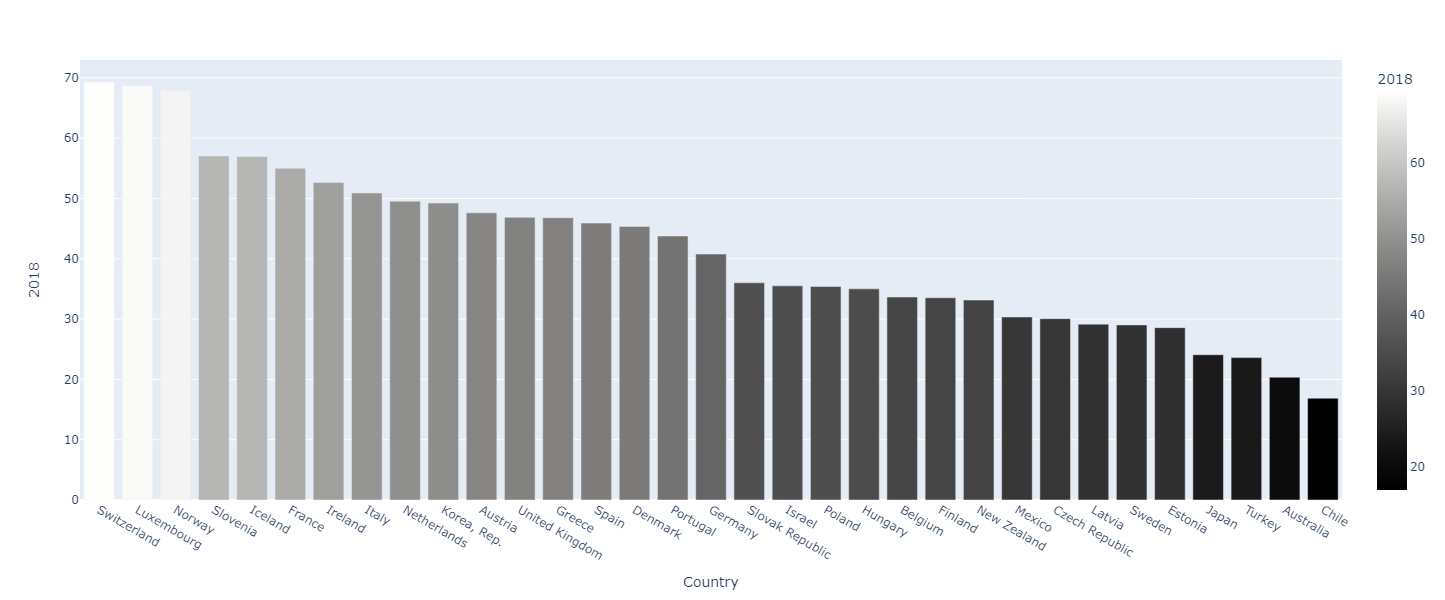

In [22]:
fig1 = px.bar(car_sorted_n, x='Country', y='2018',
             hover_data=['Country', '2018'], color='2018',
             labels={'pop':'population of Canada'}, color_continuous_scale = 'gray', height=600
)
fig1.show()

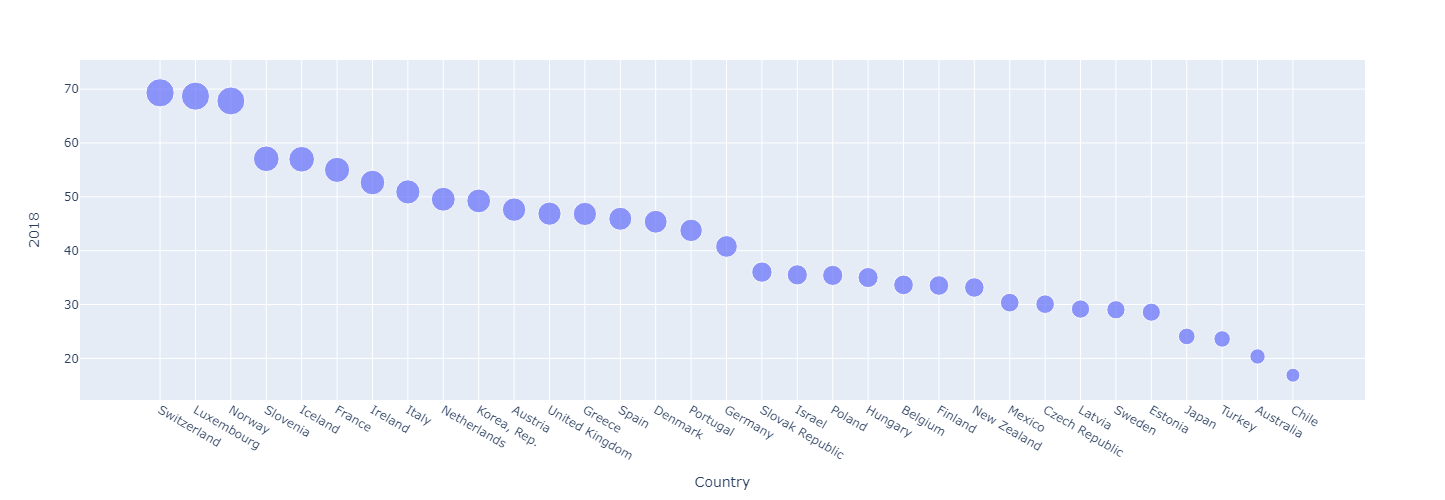

In [23]:
fig1_a = px.scatter(car_sorted_n, x="Country", y="2018",
                 size='2018', hover_data=['Country', '2018'], height=500, color_continuous_scale = 'RdBu')
fig1_a.show()

In [24]:
co2_sorted = co2.sort_values("2020", ascending=False).reset_index(drop=True)
co2_sorted.drop(co2_sorted.tail(2).index, inplace = True)
co2_sorted.head()


Country   2020
0                Qatar  37.02
1             Mongolia  26.98
2  Trinidad and Tobago  25.37
3    Brunei Darussalam  23.22
4               Kuwait  20.83

In [25]:
co2_sorted_n = co2_sorted.dropna(subset=['2020'])

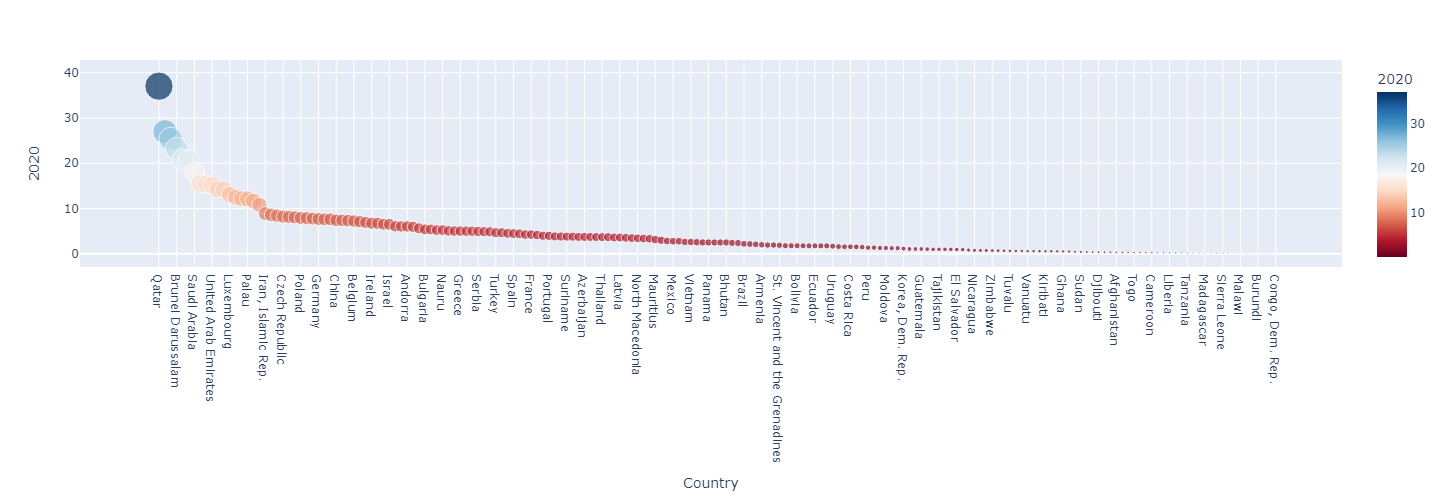

In [26]:
fig2 = px.scatter(co2_sorted_n, x="Country", y="2020", color="2020",
                 size='2020', hover_data=['Country', '2020'], height=500, color_continuous_scale = 'RdBu')
fig2.show()

In [27]:
oce.head()

Country   2020
0                Angola  55.34
1               Albania  56.83
2  United Arab Emirates  68.33
3             Argentina  82.18
4   Antigua and Barbuda  61.67

In [28]:
oce_n = oce.dropna(subset=['2020'])

In [29]:
oce_n = oce_n.sort_values("2020", ascending=False).reset_index(drop=True)

In [30]:
oce_n.tail()

Country   2020
143  Slovenia  28.41
144     Nauru  24.24
145     Benin  23.91
146      Togo  21.44
147    Monaco  19.61

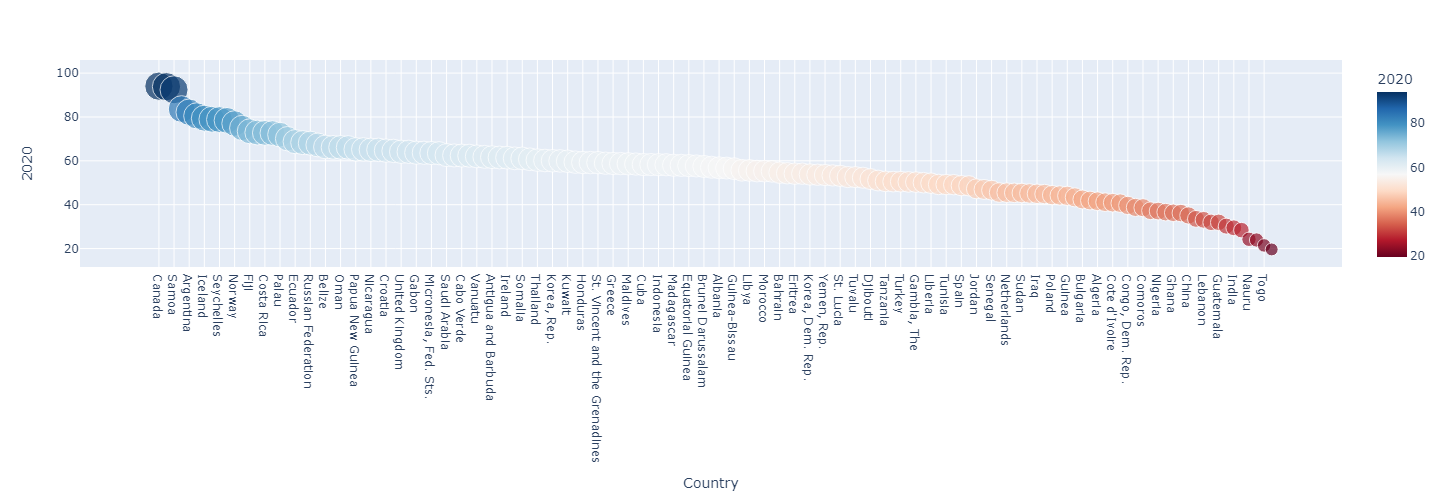

In [31]:
fig3 = px.scatter(oce_n, x="Country", y="2020", color="2020",
                 size='2020', hover_data=['Country', '2020'], height=500, color_continuous_scale = 'RdBu')
fig3.show()

In [32]:
ter_n = ter.dropna(subset=['2020'])

In [33]:
ter_n = ter_n.sort_values("2020", ascending=False).reset_index(drop=True)

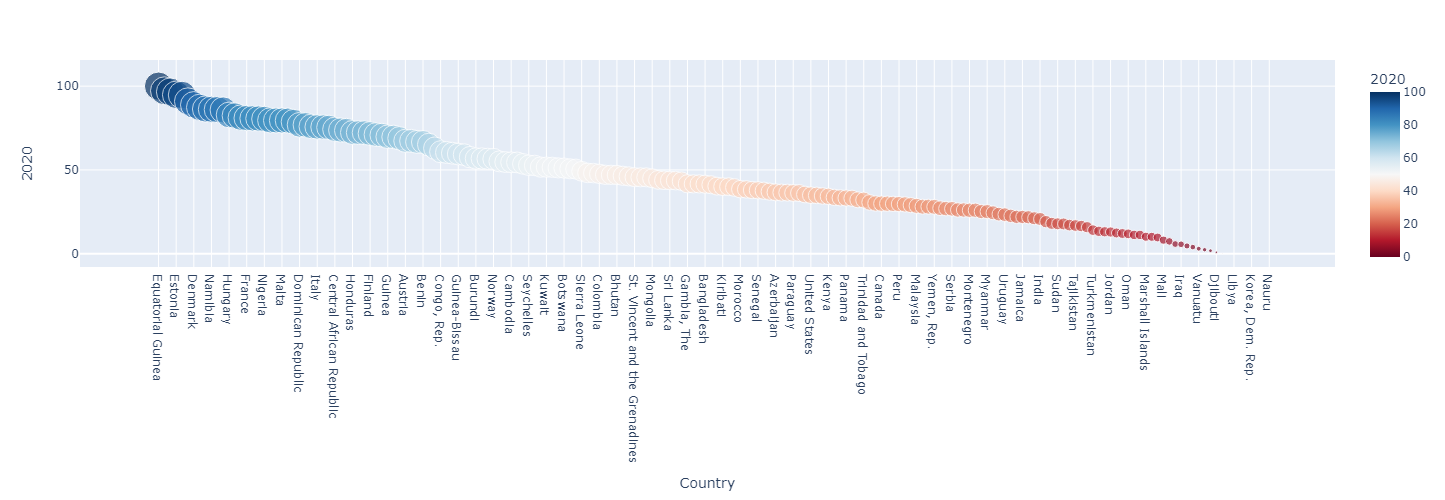

In [34]:
fig4 = px.scatter(ter_n, x="Country", y="2020", color="2020",
                 size='2020', hover_data=['Country', '2020'], height=500, color_continuous_scale = 'RdBu')
fig4.show()

In [35]:
wat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  153 non-null    object 
 1   2020     153 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [36]:
wat_n = wat.dropna(subset=['2020'])

In [37]:
wat_n = wat_n.sort_values("2020", ascending=False).reset_index(drop=True)

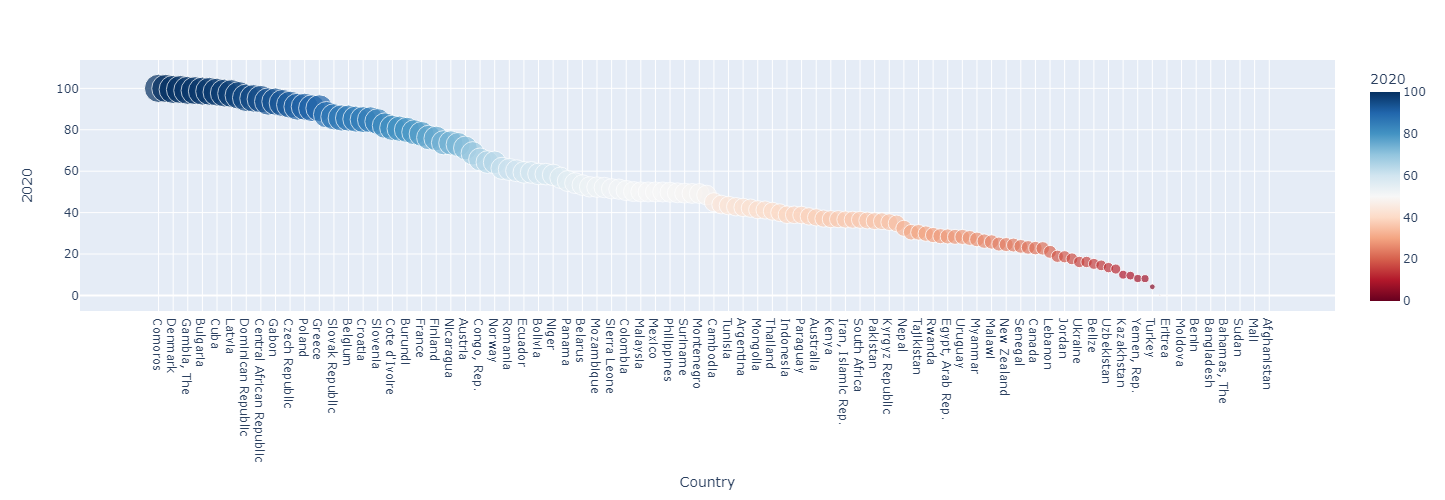

In [38]:
fig5 = px.scatter(wat_n, x="Country", y="2020", color="2020",
                 size='2020', hover_data=['Country', '2020'], height=500, color_continuous_scale = 'RdBu')
fig5.show()

In [39]:
gdp = pd.read_csv('../data/gdp_clean.csv')

In [40]:
gdp.head()

Unnamed: 0  Area Code Area Code (M49)         Area  Item Code  \
0           1          2            '004  Afghanistan      22008   
1           2          2            '004  Afghanistan      22008   
2          10          2            '004  Afghanistan      22008   
3          11          2            '004  Afghanistan      22008   
4          57          3            '008      Albania      22008   

                     Item  Element Code  \
0  Gross Domestic Product          6110   
1  Gross Domestic Product          6119   
2  Gross Domestic Product          6182   
3  Gross Domestic Product         61820   
4  Gross Domestic Product          6110   

                                     Element      Unit         1970  \
0                                  Value US$  millions  1731.435587   
1                       Value US$ per capita       US$   154.957138   
2             Annual growth US$, 2015 prices         %          NaN   
3  Annual growth US$ per capita, 2015 prices         %          NaN   
4                                  Value US$  millions  2265.577056   

          1971         1972         1973         1974         1975  \
0  1812.837521  1647.900178  1702.716294  2061.729287  2319.753506   
1   157.975357   139.756605   140.616194   166.095029   182.813796   
2    -0.275710   -12.810108    -2.019357     4.897282     6.044891   
3    -2.881537   -15.164835    -4.663212     2.445652     3.713528   
4  2330.584860  2397.526448  2466.543461  2537.015817  2610.110369   

          1976         1977         1978         1979         1980  \
0  2513.580659  2864.939207  3222.963833  3630.767856  3646.796868   
1   194.202472   217.513678   241.579792   270.729453   273.035141   
2     5.624419    -2.802194     4.525696    -0.479355    -3.458352   
3     3.580563    -4.567901     3.234153    -1.002506    -3.037975   
4  2685.745678  2760.746397  2842.275926  2372.305641  2141.837051   

          1981         1982         1983         1984         1985  \
0  3427.482014  3430.645143  3408.204613  3369.110951  3330.465681   
1   260.216148   266.302169   271.835860   276.059517   278.975344   
2     0.809697     2.060684     4.284585     2.492561     0.609843   
3     2.219321     4.342273     7.099143     5.371429     2.819957   
4  2215.474766  2280.424885  2305.384485  2275.736342  2324.414456   

          1986         1987         1988         1989         1990  \
0  3320.888887  2983.743471  2713.899488  3191.557068  3559.511736   
1   282.961677   257.118767   233.594278   268.901352   286.772753   
2     2.387646    -7.385777    -8.754283    -7.347285    -4.047939   
3     4.113924    -6.281662    -8.864865    -9.371293    -8.246073   
4  2397.086883  2378.194810  2460.399974  2940.586487  2145.751209   

          1991         1992         1993         1994         1995  \
0  3402.654940  3444.711414  2844.442641  1715.169169  2756.838036   
1   255.857628   237.803353   179.839036   100.444869   152.221868   
2    -9.152279    -1.432304   -19.131705   -23.006800    30.531784   
3   -15.121255    -9.579832   -25.836431   -28.822055    23.239437   
4  1597.139589  1516.132824  1700.439125  1880.950821  2392.764887   

          1996         1997         1998         1999         2000  \
0  2669.785634  2924.589326  2935.139404  2157.197316  3342.034168   
1   141.607370   151.085927   148.706776   106.946309   160.829727   
2     3.565620    -5.170935    -4.678136    -4.780877    -5.353291   
3    -0.571429    -7.758621    -6.542056    -6.666667    -8.214286   
4  3199.642024  2224.654241  2554.868837  3221.670165  3487.586302   

          2001         2002         2003         2004         2005  \
0  3598.470576  4141.523943  4729.042179  5388.482107  6220.574147   
1   166.541981   183.247028   199.698828   217.921744   242.477079   
2    -5.635687    48.567111    15.806910     2.860370     7.508421   
3    -9.338521    42.489270    10.240964    -1.366120     3.601108   
4  3926.887597  4355.865889  556

In [41]:
gdp_sort = gdp.sort_values("2020", ascending=False).reset_index(drop=True)

In [42]:
gdp_sort_pc = gdp_sort[gdp_sort['Element'] == 'Value US$ per capita']

In [46]:
gdp_sort_pc.head(10)

Unnamed: 0  Area Code Area Code (M49)                      Area  \
83         7479        125            '438             Liechtenstein   
84         8387        140            '492                    Monaco   
91         1404         17            '060                   Bermuda   
92         7605        256            '442                Luxembourg   
102        2490         36            '136            Cayman Islands   
103       12649        211            '756               Switzerland   
104        6267        104            '372                   Ireland   
112        9592        162            '578                    Norway   
114        5887         99            '352                   Iceland   
117       13823        231            '840  United States of America   

     Item Code                    Item  Element Code               Element  \
83       22008  Gross Domestic Product          6119  Value US$ per capita   
84       22008  Gross Domestic Product          6119  Value US$ per capita   
91       22008  Gross Domestic Product          6119  Value US$ per capita   
92       22008  Gross Domestic Product          6119  Value US$ per capita   
102      22008  Gross Domestic Product          6119  Value US$ per capita   
103      22008  Gross Domestic Product          6119  Value US$ per capita   
104      22008  Gross Domestic Product          6119  Value US$ per capita   
112      22008  Gross Domestic Product          6119  Value US$ per capita   
114      22008  Gross Domestic Product          6119  Value US$ per capita   
117      22008  Gross Domestic Product          6119  Value US$ per capita   

    Unit          1970          1971          1972          1973  \
83   US$   5201.632399   5926.758415   6924.890773   9138.158863   
84   US$  12098.216859  13391.188840  16192.315919  20707.302065   
91   US$   5051.576334   5659.755320   6241.982754   7070.299196   
92   US$   4291.857143   4438.105903   5510.556369   7495.899648   
102  US$   3398.315869   4061.624585   5106.502121   6262.204574   
103  US$   4067.627430   4847.011752   5898.909960   7880.952241   
104  US$   1511.828052   1732.090947   2115.861384   2466.046786   
112  US$   3305.984650   3734.212300   4412.733806   5689.282987   
114  US$   2576.504679   3236.552273   3999.679847   5405.755288   
117  US$   5122.838454   5510.585594   5997.614233   6624.147081   

             1974          1975          1976          1977          1978  \
83   10797.970232  12189.720372  13467.460624  15379.336846  20920.776033   
84   22004.005886  27407.474127  27917.752077  30424.645704  37173.442038   
91    8118.239605   8876.056651   9852.534385  10609.689075  11389.051086   
92    9065.474540   8823.152179   9601.632916  10555.933006  13068.634453   
102   6861.043531   7681.663322   8614.524852   9662.640185  10875.654542   
103   9040.156980  10339.482170  10816.484708  11578.401360  16243.150861   
104   2559.848640   3023.650115   2964.057354   3469.263669   4447.522645   
112   6810.691658   8202.916375   8924.241841  10263.264976  11461.305083   
114   7028.874761   6451.693722   7578.489890   9936.333387  11205.971339   
117   7117.166698   7690.772224   8473.663483   9329.866737  10441.188672   

             1979          1980          1981          1982          1983  \
83   24630.096809  26462.960127  23174.601431  23688.209070  23811.824365   
84   44519.751251  50185.097498  43372.375421  40517.008639  38137.531519   
91   13143.619290  15674.576744  17020.813420  18858.720231  20860.515908   
92   15207.332050  16536.611896  13853.820598  12605.257657  12384.563925   
102  12306.363850  14018.273497  16080.675416  18546.873359  25031.857997   
103  18302.306664  19519.983340  17842.781184  18214.535192  18048.306198   
104   5482.507435   6426.115233   6041.403928   6218.654284   5968.941264   
112  13045.498741  15770.400929  15515.243070  15236.405175  14941.508632   
114  12620.067201  14813.633791  15143.260626  13746.438275  11

In [45]:
gdp_sort_pc_int = ['Luxembourg', 'Switzerland', 'Ireland', 'Norway', 'Iceland', 'United States of America', 'Denmark', 'Qatar']

In [48]:
emi = pd.read_csv('../data/emissions_clean.csv')

In [49]:
emi.head()

Unnamed: 0         Area  Item Code                     Item  \
0          59  Afghanistan       6751               Forestland   
1          61  Afghanistan       6750    Net Forest conversion   
2         212  Afghanistan       6825  All sectors with LULUCF   
3         213  Afghanistan       6825  All sectors with LULUCF   
4         214  Afghanistan       6825  All sectors with LULUCF   

           Element        Unit  1961  1962  1963  1964  1965  1966  1967  \
0  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  Emissions (CH4)  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  Emissions (N2O)  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989       1990  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -2388.8030   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     0.0000   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   283.4658   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     9.5760   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   380.1970   

        1991       1992       1993       1994       1995       1996  \
0 -2388.8030 -2388.8030 -2388.8030 -2388.8030 -2388.8030 -2388.8030   
1     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
2   296.7285   302.0717   309.1496   323.3615   342.3478   378.7676   
3     9.8467     9.6522     9.7923     9.2279     9.6663    10.4915   
4   217.1970  -827.8030  -898.8030  -967.8030 -1025.8030 -1104.8030   

        1997       1998       1999       2000       2001       2002  \
0 -2388.8030 -2388.8030 -2388.8030 -2388.8030   121.9016   121.9016   
1     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
2   408.8165   432.2855   466.2228   419.1023   371.2675   447.8971   
3    11.5397    12.5119    13.4194    11.6462    10.2895    11.9045   
4 -1185.8030 -1244.8030 -1460.8030 -1474.8030  1066.9016  1347.9016   

        2003       2004       2005       2006       2007       2008  \
0   121.9016   121.9016   121.9016   121.9016   121.9016   121.9016   
1     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
2   463.6655   465.8062   477.8682   487.9664   501.3724   546.1793   
3    12.3870    12.3179    12.8563    12.3056    12.0883    13.1119   
4  1478.9016  1187.9016  1610.9016  1947.9016  2579.9016  4516.9016   

        2009       2010        2011        2012       2013       2014  \
0   121.9016   121.9016   -246.2191   -246.2191  -246.2191  -246.2191   
1     0.0000     0.0000      0.0000      0.0000     0.0000     0.0000   
2   562.1262   631.3810    652.3301    648.2713   648.8900   663.5479   
3    14.1314    15.6135     16.3091     16.3303    16.3723    17.3372   
4  7068.9016  8751.9016  12143.7809  10317.7809  8554.7809  7853.7809   

        2015       2016       2017       2018       2019       2020  2021  \
0  -246.2191   154.6574   154.6574   154.6574   154.6574   154.6574   NaN   
1     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   NaN   
2   634.5774   629.3893   624.3983   635.7765   638.0114   662.7644   NaN   
3    17.2410    17.0810    17.9014    15.9129    15.9893    16.7350   NaN   
4  7937.7809  7194.6574  8355.6574  8840.6574  9630.6574  9592.6574   NaN   

       2030      2050  
0       NaN       NaN 

In [50]:
emi_sort = emi.sort_values("2020", ascending=False).reset_index(drop=True)

In [56]:
pd.set_option('display.max_rows', None)

In [61]:
emi_sort_l = emi_sort[emi_sort['Item'] == 'All sectors without LULUCF']

In [66]:
emi_sort_l.head(30)

Unnamed: 0                                     Area  Item Code  \
1        50946                                    World       6829   
3        58545                    Non-Annex I countries       6829   
4        53489                                     Asia       6829   
6        53916                             Eastern Asia       6829   
8        58270                        Annex I countries       6829   
9         9246                                    China       6829   
10        9834                          China, mainland       6829   
12       58760                                     OECD       6829   
17       52421                                 Americas       6829   
18       54770                                   Europe       6829   
19       52636                         Northern America       6829   
21       48143                 United States of America       6829   
25       54128                            Southern Asia       6829   
27       57780        Low Income Food Deficit Countries       6829   
32       54985                           Eastern Europe       6829   
33       56921                      European Union (27)       6829   
34       21419                                    India       6829   
39       54555                             Western Asia       6829   
41       37901                       Russian Federation       6829   
43       54340                       South-eastern Asia       6829   
45       51158                                   Africa       6829   
46       57994  Net Food Importing Developing Countries       6829   
50       55621                           Western Europe       6829   
57       23468                                    Japan       6829   
59       53274                            South America       6829   
64       21895               Iran (Islamic Republic of)       6829   
66       57350         Land Locked Developing Countries       6829   
67       55409                          Southern Europe       6829   
70       39787                             Saudi Arabia       6829   
72       37008                        Republic of Korea       6829   

                          Item          Element        Unit  1961  1962  1963  \
1   All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
3   All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
4   All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
6   All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
8   All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
9   All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
10  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
12  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
17  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
18  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
19  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
21  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
25  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
27  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
32  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
33  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
34  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
39  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
41  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
43  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
45  All sectors without LULUCF  Emissions (CO2)  kilotonnes   NaN   NaN   NaN   
46  All sectors without LULUCF  Emissions (CO2)  ki

Richest countries 'Luxembourg', 'Switzerland', 'Ireland', 'Norway', 'Iceland', 'United States of America', 'Denmark', 'Qatar': at the end Europe, USA and qater
Most polluting ‘China’, ‘United States of America’, ‘India’, ‘Russian Federation’, ‘Japan’, ‘Iran’, ‘Saudi Arabia’]  and Europe in general 
From this overall emission of Co2, the emission related to fossi fuel combustion and cement, we can see again that simialr countries appeared

CO₂ emissions from fossil fuel combustion and cement production units tCO2/capita

In [92]:
co2_sorted_n.head()


Country   2020
0                Qatar  37.02
1             Mongolia  26.98
2  Trinidad and Tobago  25.37
3    Brunei Darussalam  23.22
4               Kuwait  20.83

In [93]:
cs = co2_sorted_n.copy()


In [101]:
cs.shape

(186, 2)

In [102]:
cs_sub = cs[:50]

In [103]:
cs_sub.shape

(50, 2)

In [104]:
cs_sub.head()

Country   2020
0                Qatar  37.02
1             Mongolia  26.98
2  Trinidad and Tobago  25.37
3    Brunei Darussalam  23.22
4               Kuwait  20.83

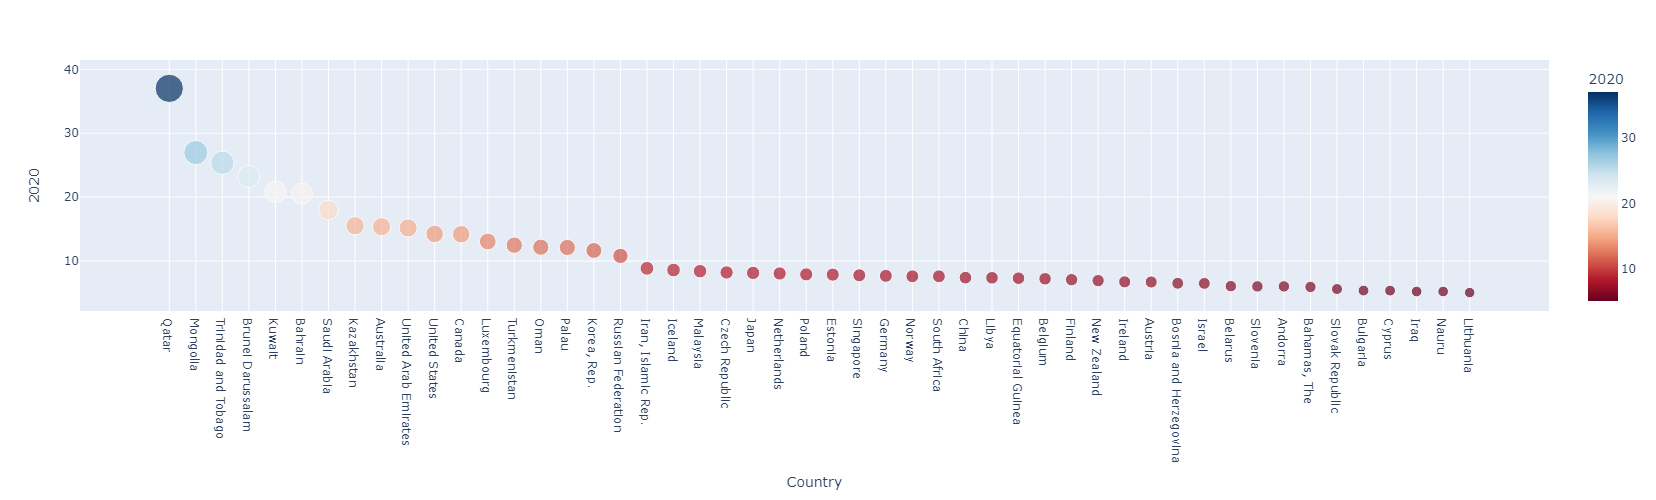

In [105]:
fig2_a = px.scatter(cs_sub, x="Country", y="2020", color="2020",
                 size='2020', hover_data=['Country', '2020'], height=500, color_continuous_scale = 'RdBu')
fig2_a.show()

In [108]:
cs.head(10)

Country   2020
0                 Qatar  37.02
1              Mongolia  26.98
2   Trinidad and Tobago  25.37
3     Brunei Darussalam  23.22
4                Kuwait  20.83
5               Bahrain  20.55
6          Saudi Arabia  17.97
7            Kazakhstan  15.52
8             Australia  15.37
9  United Arab Emirates  15.19